<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/8_%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5_Transfer_Learing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

- 좋은 성능을 내는 모델 구축
    - 인공신경망을 새로 구성
        - 기존 논문 참고, 기초 토대가 되는 모델(백본)을 기반으로 작성
    - 대량의 데이터
    - 충분한 학습 시간,최적화 포함
    - 많은 시간/비용등 자원이 필요하다
- 이미 과거에 잘 만들어진 모델이 있다면
    - **Pre-Trained Model**
        - 대규모 데이터 세트로 학습이 진행
        - 학습 완료된 모델
        - 상업적 이용 문제 없다면(이익, 변형 등등)
        - 이런 모델을 가져와서 사용/수정후사용/신규학습진행후 사용 -> 이미 확보된 성능 보장 받는다 -> 유전자를 통해서 정보를 전이하는 방식과 유사
        - 이런 방식은 **전이학습**이라고 한다
- 장점
    - 시간/비용 단축
    - 기존 모델 + 새로운 개념/데이터 =>기회비용 창출
    - ..

# 백본(Backbone)

- 딥러닝 모델 혹은 모델의 일부
- 백본, 백본 네트워크
- 예시
    - 초규모 딥러닝 모델을 백본 모델로 사용
        - BERT, GPT, VGG-16, ResNet
- 용도
    - 모델 구성시 백본을 기반으로 신경망 구성
    - 정규화, 정직화(L1,L2규제등등) 가미하여 구성
    - 신경망 추가, 변형등 구성

# 전이학습 (Transfer Learning)

- 특징
    - 지식의 재사용
    - 처음부터 학습하지 X, 새로운 과제 해결
        - 사전 학습된 모델을 활용
- 용어
    - 업스트림
        - 특정 목적(용도)로 만들어진, 사전학습된 모델/서비스
        - 백본
        - VGG, Bert, GPT, ..
    - 다운스트림
        - 지식 전이
        - **전이 학습을 통해서 새로 만들고자 하는 모델/서비스 유형**
        - **업스트림 모델을 기반으로, 새로운 목적을 가진 다운스트림 모델을 생성한다**
            - 프로젝트 컨셉

# 학습 방법

## 파인튜닝_미세조정

### 프럼프트 러닝

- 다운스트림 풀 데이터를 모두 학습에 사용
- 가중치 업데이트됨
    - 전체 가중치 업데이트(학습)
        - 기존 백본의 가중치를 모두 초기화 -> 구조만 가져온다
        - 학습 시간 많이 소요
    - 부분 가중치 업데이트(학습) (출력층중심)
    - 백본에 신경망을 추가하여 추가된 부분만 가중치 업데이트(학습)

### 인컨텍스트 러닝

- 다운스트림용 데이터를 일부만 학습에 사용

#### 제로샷 러닝

- 다운스트림 데이터를 하나도 사용하지 않는다
- 업스트림 모델을 그대로 사용
- 사전학습된 모델을 다른 도메인에 사용

#### 원샷 러닝

- 다운스트림 데이터를 1건 학습에 사용
    - 가중치가 미세하게 조정
- 1건이 성능에 어떤 영향을 미치는지 검토후 향후 전략 수립

#### 퓨샷 러닝

- 다운스트림 데이터를 몇 건 학습에 사용
    - 가중치가 미세하게 조정
- 몇건은 정의되어 있지 않다

# 전이학습 신경망 구조

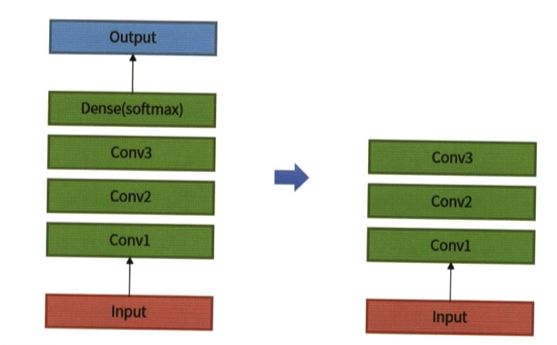

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/SeSAC/share/딥러닝/전이학습/학습_001_전이학습_1.png')
# 기존 업스트림 모델에서
# softmax, output 레이어 제거

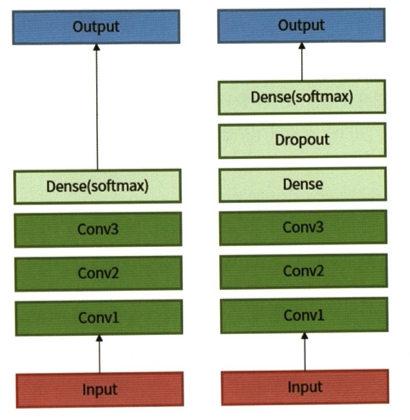

In [ ]:
Image('/content/drive/MyDrive/SeSAC/share/딥러닝/전이학습/학습_001_전이학습_2.png')

# 업스트림 모델 중간에 새로운 층 개입 -> deep 하게 구성

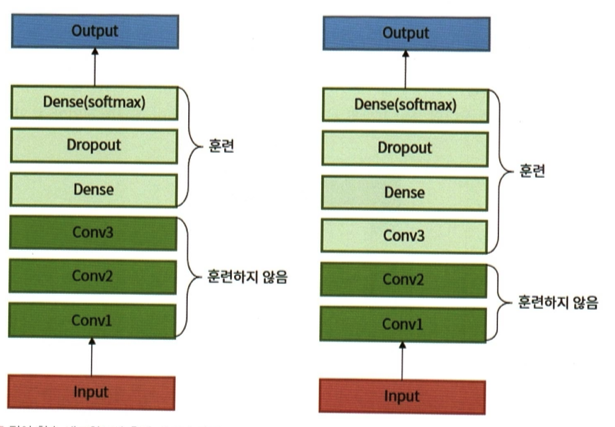

In [ ]:
Image('/content/drive/MyDrive/SeSAC/share/딥러닝/전이학습/학습_001_전이학습_3.png')

# 업스트림 모델에서 특정 부분은 훈련가능하게, 혹은 훈련불가하게(frezze:얼린다) 설정가능
# trainable = True/False

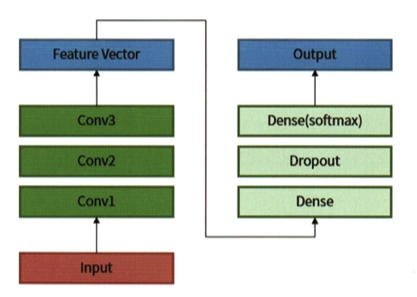

In [ ]:
Image('/content/drive/MyDrive/SeSAC/share/딥러닝/전이학습/학습_001_전이학습_4.png')
# 왼쪽에 업스트림 모델의 출력 부분제거하고 새로운 신경망을 연결
# 업스트림 모델을 내가 만든 모델에 입력으로 추가

# 모델은 어디서 획득 가능한지 - 사이트, 커뮤니티

- 딥러닝 프레임웍
    - 텐서플로우 허브
        - https://www.tensorflow.org/hub
        - https://tfhub.dev/
    - 토치허브
        - https://pytorch.kr/hub

- 사이트
    - 허깅페이스
        - 트랜스포머 기반 모델들이 주류, NLP 모델이 가장 많다
        - https://huggingface.co

    - MXNet
        - apache 재단
        - https://mxnet.apache.org/versions/1.9.1/
        - 프레임웍, 딥러닝 프레임웍 종류에 상관없이 범용적으로 적용 가능한 포멧 지원
        - 생태계 지원

    - ONNX
        - 생태계, 공통된 모델 포멧 지원/변환 지원
        - 개방형
        - https://onnx.ai/
    
    - git
        - 오픈소스 제공

# 예시

In [ ]:
# 케라스에서 사전학습된 모델 로드 -> 백본의 구조가 다 보임
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = MobileNetV2()
model.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

In [ ]:
# 허브 -> 구조가 잘 않보임 -> 백본구조를 숨김
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001])
])
m.build([None, 224, 224, 3]) # Batch input shape.


In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
Total params: 3540265 (13.51 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________
